In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1.     
Reading
the Dataset



In [13]:
df= pd.read_csv('IPEDS_data.csv')
df

,ID number,Name,year,ZIP code,Highest degree offered,County name,Longitude location of institution,Latitude location of institution,Religious affiliation,Offers Less than one year certificate,...,Percent of freshmen receiving federal grant aid,Percent of freshmen receiving Pell grants,Percent of freshmen receiving other federal grant aid,Percent of freshmen receiving state/local grant aid,Percent of freshmen receiving institutional grant aid,Percent of freshmen receiving student loan aid,Percent of freshmen receiving federal student loans,Percent of freshmen receiving other loan aid,Endowment assets (year end) per FTE enrollment (GASB),Endowment assets (year end) per FTE enrollment (FASB)
0,100654,Alabama A & M University,2013,35762,Doctor's degree - research/scholarship,Madison County,-86.568502,34.783368,Not applicable,Implied no,...,81.0,81.0,7.0,1.0,32.0,89.0,89.0,1.0,NaN,NaN
1,100663,University of Alabama at Birmingham,2013,35294-0110,Doctor's degree - research/scholarship and pro...,Jefferson County,-86.809170,33.502230,Not applicable,Implied no,...,36.0,36.0,10.0,0.0,60.0,56.0,55.0,5.0,24136.0,NaN
2,100690,Amridge University,2013,36117-3553,Doctor's degree - research/scholarship and pro...,Montgomery County,-86.174010,32.362609,Churches of Christ,Implied no,...,90.0,90.0,0.0,40.0,90.0,100.0,100.0,0.0,NaN,302.0
3,100706,University of Alabama in Huntsville,2013,35899,Doctor's degree - research/scholarship and pro...,Madison County,-86.638420,34.722818,Not applicable,Yes,...,31.0,31.0,4.0,1.0,63.0,46.0,46.0,3.0,11502.0,NaN
4,100724,Alabama State University,2013,36104-0271,Doctor's degree - research/scholarship and pro...,Montgomery County,-86.295677,32.364317,Not applicable,Implied no,...,76.0,76.0,13.0,11.0,34.0,81.0,81.0,0.0,13202.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1529,451671,University of South Florida-Sarasota-Manatee,2013,34243-2049,Master's degree,Manatee County,-82.562951,27.391766,Not applicable,Implied no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4422.0,NaN
1530,454184,The Kingâ€™s College,2013,10004,Bachelor's degree,New York County,-74.012348,40.706861,Interdenominational,Implied no,...,34.0,34.0,10.0,4.0,100.0,57.0,56.0,12.0,NaN,935.0
1531,454582,Ottawa University-Online,2013,66067,Master's degree,Franklin County,-95.263775,38.602692,American Baptist,Implied no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20863.0
1532,455770,Providence Christian College,2013,91104,Bachelor's degree,Los Angeles County,-118.118491,34.172750,Undenominational,Implied no,...,50.0,50.0,14.0,0.0,100.0,64.0,64.0,14.0,NaN,350.0


In [18]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534 entries, 0 to 1533
Data columns (total 145 columns):
 #    Column                                                                                  Non-Null Count  Dtype  
---   ------                                                                                  --------------  -----  
 0    ID number                                                                               1534 non-null   int64  
 1    Name                                                                                    1534 non-null   object 
 2    year                                                                                    1534 non-null   int64  
 3    ZIP code                                                                                1534 non-null   object 
 4    Highest degree offered                                                                  1534 non-null   object 
 5    County name                                                 

In [24]:
null_data = df.isnull().sum()[df.isnull().sum() > 0.3*len(df)]
null_data


SAT Writing 25th percentile score                            820
SAT Writing 75th percentile score                            820
Number of first-time undergraduates - in-state               623
Percent of first-time undergraduates - in-state              623
Number of first-time undergraduates - out-of-state           623
Percent of first-time undergraduates - out-of-state          623
Number of first-time undergraduates - foreign countries      623
Percent of first-time undergraduates - foreign countries     623
Number of first-time undergraduates - residence unknown      623
Percent of first-time undergraduates - residence unknown     623
Endowment assets (year end) per FTE enrollment (GASB)       1018
Endowment assets (year end) per FTE enrollment (FASB)        574
dtype: int64

2.     
Data
Preparation: Cleaning and Formatting


In [25]:
df.drop(null_data.index , axis=1, inplace=True)

In [26]:
df.shape

(1534, 133)

In [30]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534 entries, 0 to 1533
Data columns (total 133 columns):
 #    Column                                                                                  Non-Null Count  Dtype  
---   ------                                                                                  --------------  -----  
 0    ID number                                                                               1534 non-null   int64  
 1    Name                                                                                    1534 non-null   object 
 2    year                                                                                    1534 non-null   int64  
 3    ZIP code                                                                                1534 non-null   object 
 4    Highest degree offered                                                                  1534 non-null   object 
 5    County name                                                 

In [36]:
our_columns=['Name', 'year', 'Highest degree offered', "Offers Bachelor's degree",
       "Offers Master's degree",
       "Offers Doctor's degree - research/scholarship",
       "Offers Doctor's degree - professional practice", 'Applicants total',
       'Admissions total', 'Enrolled total', 'Estimated enrollment, total',
       'Tuition and fees, 2013-14',
       'Total price for in-state students living on campus 2013-14',
       'Total price for out-of-state students living on campus 2013-14',
       'State abbreviation', 'Control of institution', 'Total  enrollment',
       'Full-time enrollment', 'Part-time enrollment',
       'Undergraduate enrollment', 'Graduate enrollment',
       'Full-time undergraduate enrollment',
       'Part-time undergraduate enrollment',
       ]

In [37]:
df = df[our_columns]
df

,Name,year,Highest degree offered,Offers Bachelor's degree,Offers Master's degree,Offers Doctor's degree - research/scholarship,Offers Doctor's degree - professional practice,Applicants total,Admissions total,Enrolled total,...,Total price for out-of-state students living on campus 2013-14,State abbreviation,Control of institution,Total enrollment,Full-time enrollment,Part-time enrollment,Undergraduate enrollment,Graduate enrollment,Full-time undergraduate enrollment,Part-time undergraduate enrollment
0,Alabama A & M University,2013,Doctor's degree - research/scholarship,Yes,Yes,Yes,Implied no,6142.0,5521.0,1104.0,...,27441.0,Alabama,Public,5020.0,4439.0,581.0,4051.0,969.0,3799.0,252.0
1,University of Alabama at Birmingham,2013,Doctor's degree - research/scholarship and pro...,Yes,Yes,Yes,Yes,5689.0,4934.0,1773.0,...,31687.0,Alabama,Public,18568.0,11961.0,6607.0,11502.0,7066.0,8357.0,3145.0
2,Amridge University,2013,Doctor's degree - research/scholarship and pro...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,...,NaN,Alabama,Private not-for-profit,631.0,323.0,308.0,322.0,309.0,202.0,120.0
3,University of Alabama in Huntsville,2013,Doctor's degree - research/scholarship and pro...,Yes,Yes,Yes,Yes,2054.0,1656.0,651.0,...,35780.0,Alabama,Public,7376.0,4802.0,2574.0,5696.0,1680.0,4237.0,1459.0
4,Alabama State University,2013,Doctor's degree - research/scholarship and pro...,Yes,Yes,Yes,Yes,10245.0,5251.0,1479.0,...,25222.0,Alabama,Public,6075.0,5182.0,893.0,5356.0,719.0,4872.0,484.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1529,University of South Florida-Sarasota-Manatee,2013,Master's degree,Yes,Yes,Implied no,Implied no,393.0,136.0,86.0,...,NaN,Florida,Public,1877.0,875.0,1002.0,1728.0,149.0,837.0,891.0
1530,The Kingâ€™s College,2013,Bachelor's degree,Yes,Implied no,Implied no,Implied no,3033.0,2158.0,127.0,...,48717.0,New York,Private not-for-profit,516.0,493.0,23.0,516.0,0.0,493.0,23.0
1531,Ottawa University-Online,2013,Master's degree,Yes,Yes,Implied no,Implied no,NaN,NaN,NaN,...,NaN,Kansas,Private not-for-profit,458.0,1.0,457.0,383.0,75.0,1.0,382.0
1532,Providence Christian College,2013,Bachelor's degree,Yes,Implied no,Implied no,Implied no,122.0,65.0,20.0,...,38602.0,California,Private not-for-profit,66.0,66.0,0.0,66.0,0.0,66.0,0.0


In [38]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534 entries, 0 to 1533
Data columns (total 23 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   Name                                                            1534 non-null   object 
 1   year                                                            1534 non-null   int64  
 2   Highest degree offered                                          1534 non-null   object 
 3   Offers Bachelor's degree                                        1532 non-null   object 
 4   Offers Master's degree                                          1532 non-null   object 
 5   Offers Doctor's degree - research/scholarship                   1532 non-null   object 
 6   Offers Doctor's degree - professional practice                  1532 non-null   object 
 7   Applicants total                                   

In [39]:
df.dropna(inplace=True, axis=0)

C:\Users\PCCV\AppData\Local\Temp\ipykernel_30896\1592113188.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True, axis=0)


In [40]:
df.isnull().sum()

Name                                                              0
year                                                              0
Highest degree offered                                            0
Offers Bachelor's degree                                          0
Offers Master's degree                                            0
Offers Doctor's degree - research/scholarship                     0
Offers Doctor's degree - professional practice                    0
Applicants total                                                  0
Admissions total                                                  0
Enrolled total                                                    0
Estimated enrollment, total                                       0
Tuition and fees, 2013-14                                         0
Total price for in-state students living on campus 2013-14        0
Total price for out-of-state students living on campus 2013-14    0
State abbreviation                              

In [41]:
df.shape

(1326, 23)

In [45]:
df.duplicated().sum()

np.int64(0)

3.     
Exploratory
Data Analysis (EDA) and Visualization

In [46]:
df

,Name,year,Highest degree offered,Offers Bachelor's degree,Offers Master's degree,Offers Doctor's degree - research/scholarship,Offers Doctor's degree - professional practice,Applicants total,Admissions total,Enrolled total,...,Total price for out-of-state students living on campus 2013-14,State abbreviation,Control of institution,Total enrollment,Full-time enrollment,Part-time enrollment,Undergraduate enrollment,Graduate enrollment,Full-time undergraduate enrollment,Part-time undergraduate enrollment
0,Alabama A & M University,2013,Doctor's degree - research/scholarship,Yes,Yes,Yes,Implied no,6142.0,5521.0,1104.0,...,27441.0,Alabama,Public,5020.0,4439.0,581.0,4051.0,969.0,3799.0,252.0
1,University of Alabama at Birmingham,2013,Doctor's degree - research/scholarship and pro...,Yes,Yes,Yes,Yes,5689.0,4934.0,1773.0,...,31687.0,Alabama,Public,18568.0,11961.0,6607.0,11502.0,7066.0,8357.0,3145.0
3,University of Alabama in Huntsville,2013,Doctor's degree - research/scholarship and pro...,Yes,Yes,Yes,Yes,2054.0,1656.0,651.0,...,35780.0,Alabama,Public,7376.0,4802.0,2574.0,5696.0,1680.0,4237.0,1459.0
4,Alabama State University,2013,Doctor's degree - research/scholarship and pro...,Yes,Yes,Yes,Yes,10245.0,5251.0,1479.0,...,25222.0,Alabama,Public,6075.0,5182.0,893.0,5356.0,719.0,4872.0,484.0
5,The University of Alabama,2013,Doctor's degree - research/scholarship and pro...,Yes,Yes,Yes,Yes,30975.0,17515.0,6454.0,...,41500.0,Alabama,Public,34752.0,29498.0,5254.0,29440.0,5312.0,26548.0,2892.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1515,Johnson & Wales University-Charlotte,2013,Bachelor's degree,Yes,Implied no,Implied no,Implied no,4543.0,2708.0,613.0,...,41663.0,North Carolina,Private not-for-profit,2325.0,2286.0,39.0,2325.0,0.0,2286.0,39.0
1516,Ave Maria University,2013,Doctor's degree - other,Yes,Yes,Implied no,Implied no,1611.0,960.0,254.0,...,36860.0,Florida,Private not-for-profit,988.0,965.0,23.0,906.0,82.0,890.0,16.0
1525,University of South Florida-St Petersburg,2013,Master's degree,Yes,Yes,Implied no,Implied no,3195.0,1406.0,562.0,...,31086.0,Florida,Public,4660.0,2792.0,1868.0,4025.0,635.0,2658.0,1367.0
1530,The Kingâ€™s College,2013,Bachelor's degree,Yes,Implied no,Implied no,Implied no,3033.0,2158.0,127.0,...,48717.0,New York,Private not-for-profit,516.0,493.0,23.0,516.0,0.0,493.0,23.0


In [57]:
sorted_App = df.sort_values(by='Applicants total',ascending=False)
sorted_App

,Name,year,Highest degree offered,Offers Bachelor's degree,Offers Master's degree,Offers Doctor's degree - research/scholarship,Offers Doctor's degree - professional practice,Applicants total,Admissions total,Enrolled total,...,Total price for out-of-state students living on campus 2013-14,State abbreviation,Control of institution,Total enrollment,Full-time enrollment,Part-time enrollment,Undergraduate enrollment,Graduate enrollment,Full-time undergraduate enrollment,Part-time undergraduate enrollment
84,University of California-Los Angeles,2013,Doctor's degree - research/scholarship and pro...,Yes,Yes,Yes,Yes,72676.0,15981.0,5620.0,...,55294.0,California,Public,40795.0,39794.0,1001.0,28674.0,12121.0,28084.0,590.0
81,University of California-Berkeley,2013,Doctor's degree - research/scholarship and pro...,Yes,Yes,Yes,Yes,61717.0,11108.0,4162.0,...,56197.0,California,Public,36198.0,34675.0,1523.0,25951.0,10247.0,25220.0,731.0
86,University of California-San Diego,2013,Doctor's degree - research/scholarship and pro...,Yes,Yes,Yes,Yes,60832.0,22812.0,4575.0,...,53348.0,California,Public,29517.0,28606.0,911.0,23805.0,5712.0,23152.0,653.0
841,New York University,2013,Doctor's degree - research/scholarship and pro...,Yes,Yes,Yes,Yes,57845.0,15066.0,5207.0,...,63540.0,New York,Private not-for-profit,44599.0,35096.0,9503.0,22615.0,21984.0,21365.0,1250.0
83,University of California-Irvine,2013,Doctor's degree - research/scholarship and pro...,Yes,Yes,Yes,Yes,56515.0,23956.0,5077.0,...,53382.0,California,Public,28895.0,28046.0,849.0,23530.0,5365.0,23127.0,403.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,American Jewish University,2013,Master's degree,Yes,Yes,Implied no,Implied no,100.0,59.0,23.0,...,46869.0,California,Private not-for-profit,229.0,188.0,41.0,112.0,117.0,108.0,4.0
155,Naropa University,2013,Master's degree,Yes,Yes,Implied no,Implied no,79.0,63.0,38.0,...,43620.0,Colorado,Private not-for-profit,992.0,799.0,193.0,383.0,609.0,358.0,25.0
396,Maharishi University of Management,2013,Doctor's degree - research/scholarship,Yes,Yes,Yes,Implied no,74.0,31.0,19.0,...,38630.0,Iowa,Private not-for-profit,1136.0,832.0,304.0,319.0,817.0,304.0,15.0
1354,Sterling College,2013,Bachelor's degree,Yes,Implied no,Implied no,Implied no,49.0,46.0,20.0,...,41092.0,Vermont,Private not-for-profit,116.0,104.0,12.0,116.0,0.0,104.0,12.0


C:\Users\PCCV\AppData\Local\Temp\ipykernel_30896\2969347944.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Applicants total', y='Name', data=sorted_App.head(20), palette='viridis')


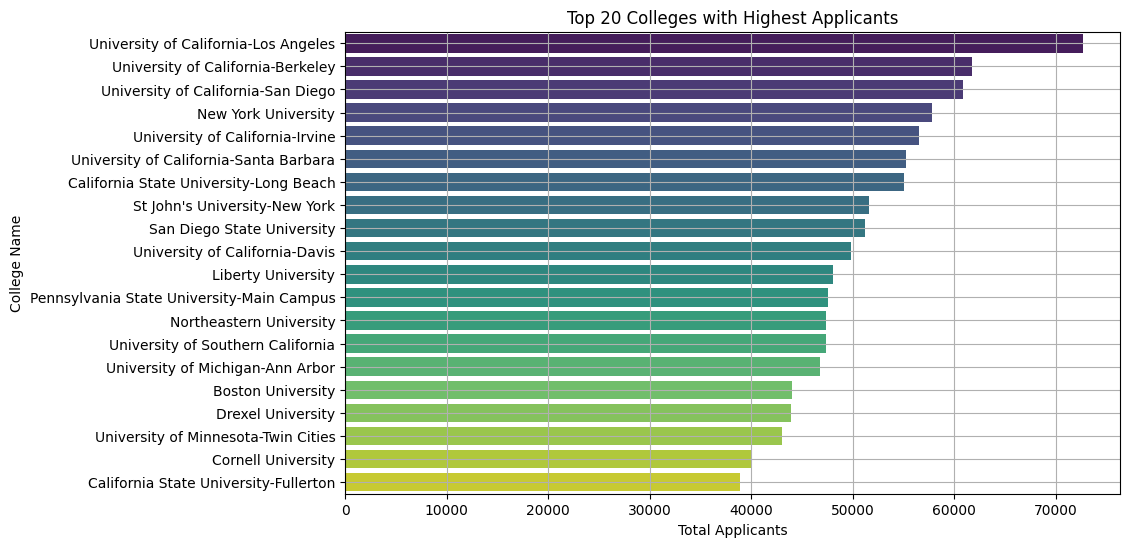

In [77]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Applicants total', y='Name', data=sorted_App.head(20), palette='viridis')
plt.title('Top 20 Colleges with Highest Applicants')
plt.xlabel('Total Applicants')
plt.ylabel('College Name')
plt.grid()
plt.show()

In [74]:
sorted_Enrolled = df.sort_values(by='Enrolled total',ascending=False)

C:\Users\PCCV\AppData\Local\Temp\ipykernel_30896\1343013820.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Enrolled total', y='Name', data=sorted_Enrolled.head(20), palette='viridis')


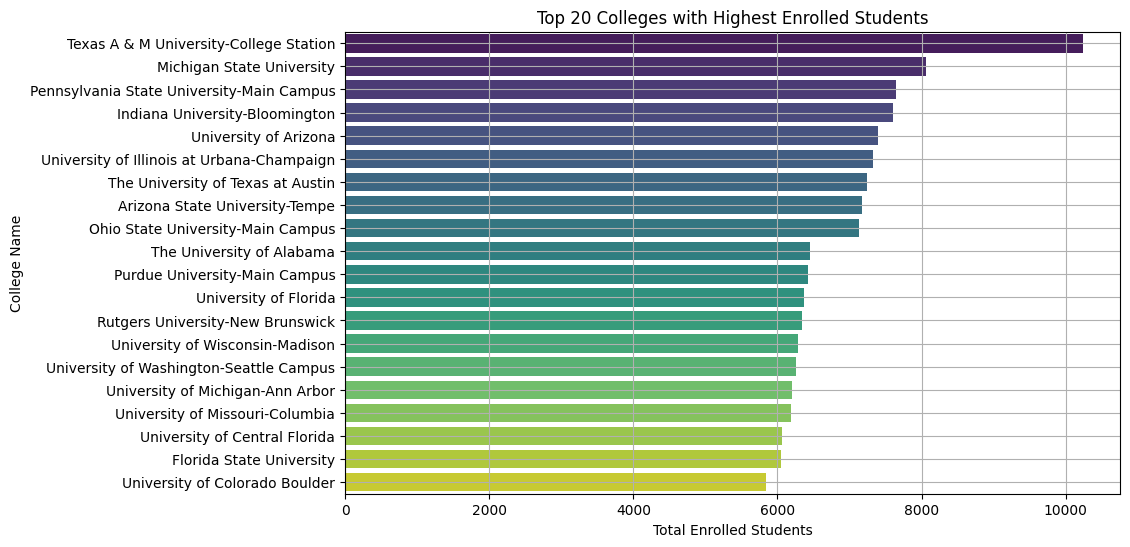

In [76]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Enrolled total', y='Name', data=sorted_Enrolled.head(20), palette='viridis')
plt.title('Top 20 Colleges with Highest Enrolled Students')
plt.xlabel('Total Enrolled Students')
plt.ylabel('College Name')
plt.grid()
plt.show()

In [98]:
df['admission_rate'] = df['Admissions total']/df['Applicants total']
sorted_ar = df.sort_values(by='admission_rate',ascending=False)

C:\Users\PCCV\AppData\Local\Temp\ipykernel_30896\2963565426.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['admission_rate'] = df['Admissions total']/df['Applicants total']


In [99]:
df['enrollment_rate'] = df['Enrolled total']/df['Admissions total']
sorted_er = df.sort_values(by='enrollment_rate',ascending=False)


C:\Users\PCCV\AppData\Local\Temp\ipykernel_30896\935024134.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['enrollment_rate'] = df['Enrolled total']/df['Admissions total']


In [100]:
df

,Name,year,Highest degree offered,Offers Bachelor's degree,Offers Master's degree,Offers Doctor's degree - research/scholarship,Offers Doctor's degree - professional practice,Applicants total,Admissions total,Enrolled total,...,Control of institution,Total enrollment,Full-time enrollment,Part-time enrollment,Undergraduate enrollment,Graduate enrollment,Full-time undergraduate enrollment,Part-time undergraduate enrollment,enrollment_rate,admission_rate
0,Alabama A & M University,2013,Doctor's degree - research/scholarship,Yes,Yes,Yes,Implied no,6142.0,5521.0,1104.0,...,Public,5020.0,4439.0,581.0,4051.0,969.0,3799.0,252.0,0.199964,0.898893
1,University of Alabama at Birmingham,2013,Doctor's degree - research/scholarship and pro...,Yes,Yes,Yes,Yes,5689.0,4934.0,1773.0,...,Public,18568.0,11961.0,6607.0,11502.0,7066.0,8357.0,3145.0,0.359343,0.867288
3,University of Alabama in Huntsville,2013,Doctor's degree - research/scholarship and pro...,Yes,Yes,Yes,Yes,2054.0,1656.0,651.0,...,Public,7376.0,4802.0,2574.0,5696.0,1680.0,4237.0,1459.0,0.393116,0.806232
4,Alabama State University,2013,Doctor's degree - research/scholarship and pro...,Yes,Yes,Yes,Yes,10245.0,5251.0,1479.0,...,Public,6075.0,5182.0,893.0,5356.0,719.0,4872.0,484.0,0.281661,0.512543
5,The University of Alabama,2013,Doctor's degree - research/scholarship and pro...,Yes,Yes,Yes,Yes,30975.0,17515.0,6454.0,...,Public,34752.0,29498.0,5254.0,29440.0,5312.0,26548.0,2892.0,0.368484,0.565456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1515,Johnson & Wales University-Charlotte,2013,Bachelor's degree,Yes,Implied no,Implied no,Implied no,4543.0,2708.0,613.0,...,Private not-for-profit,2325.0,2286.0,39.0,2325.0,0.0,2286.0,39.0,0.226366,0.596082
1516,Ave Maria University,2013,Doctor's degree - other,Yes,Yes,Implied no,Implied no,1611.0,960.0,254.0,...,Private not-for-profit,988.0,965.0,23.0,906.0,82.0,890.0,16.0,0.264583,0.595903
1525,University of South Florida-St Petersburg,2013,Master's degree,Yes,Yes,Implied no,Implied no,3195.0,1406.0,562.0,...,Public,4660.0,2792.0,1868.0,4025.0,635.0,2658.0,1367.0,0.399716,0.440063
1530,The Kingâ€™s College,2013,Bachelor's degree,Yes,Implied no,Implied no,Implied no,3033.0,2158.0,127.0,...,Private not-for-profit,516.0,493.0,23.0,516.0,0.0,493.0,23.0,0.058851,0.711507


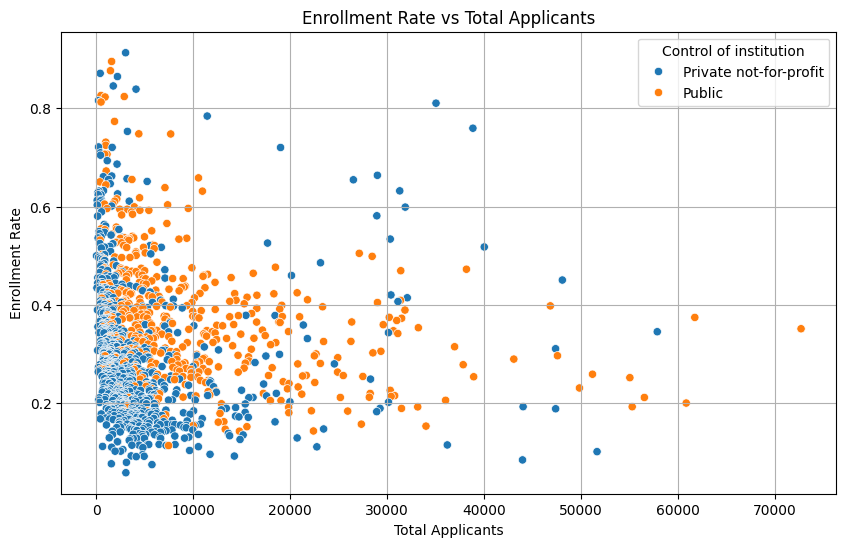

In [111]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Applicants total', y='enrollment_rate', data=sorted_er , hue='Control of institution')
plt.title('Enrollment Rate vs Total Applicants')
plt.xlabel('Total Applicants')
plt.ylabel('Enrollment Rate')
plt.grid()
plt.show()

1 - Then there is no relation between the numbers of application and the preferred universities by students

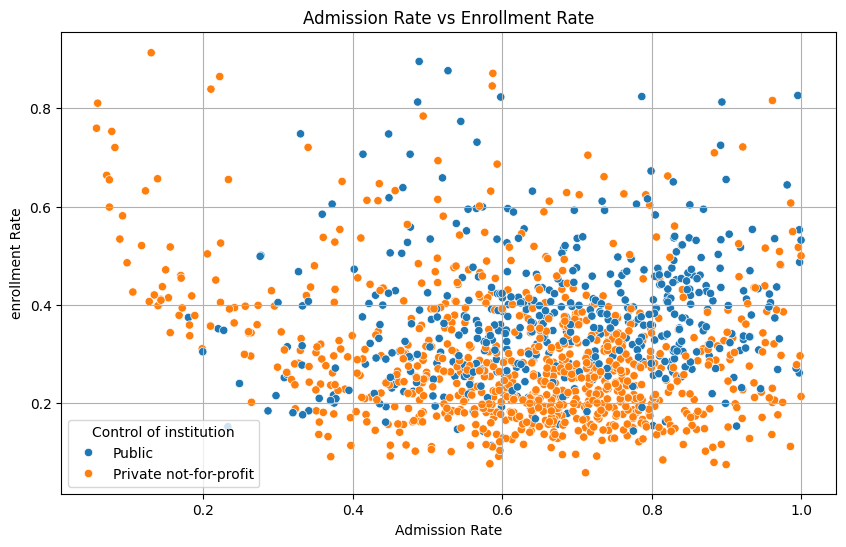

In [112]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='admission_rate', y='enrollment_rate', data=df, hue='Control of institution')
plt.title('Admission Rate vs Enrollment Rate')
plt.xlabel('Admission Rate')
plt.ylabel('enrollment Rate')
plt.grid()
plt.show()

2 - There is no relation between the universities with high admission rate and the universities prefered by students

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Applicants total', y='Enrolled total', data=df,hue='Name',legend=False)
plt.title('Top 10 Colleges with Highest Admission Rate')
plt.xlabel('Applicants Total')
plt.ylabel('Total enrolled')
plt.legend(loc='upper right')
plt.grid()
plt.show()

<Axes: xlabel='Control of institution', ylabel='Count'>

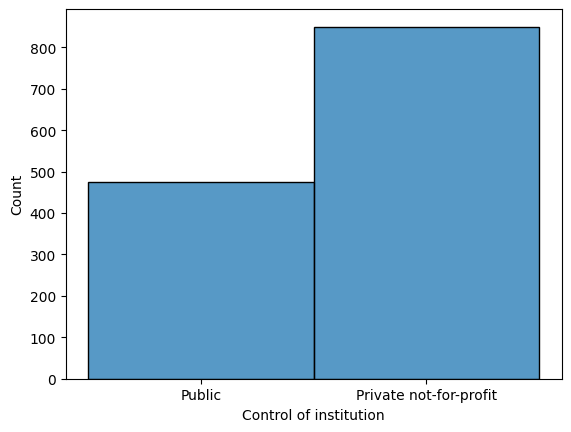

In [108]:
sns.histplot(df['Control of institution'])